# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]
print(type(dataset))
print(dataset)
print(new_point)

<class 'dict'>
{'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}
[5, 7]


[[<matplotlib.collections.PathCollection at 0x7f265ef0e2d0>,

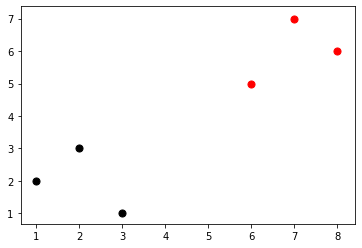

In [3]:
# pintar 6 graficas con for
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
#plt.scatter(new_point[0],new_point[1], s = 100)


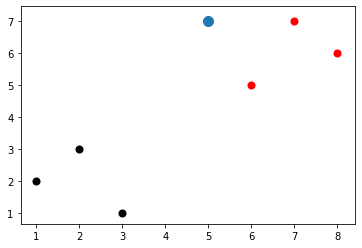

In [4]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [5]:
data = dataset # RECORRER TODO EL DATASET
for group in data:
    print(group)
    for feature in data[group]:
        print(feature)
        print("sorted:",sorted(feature))# ordenar

k
[1, 2]
sorted: [1, 2]
[2, 3]
sorted: [2, 3]
[3, 1]
sorted: [1, 3]
r
[6, 5]
sorted: [5, 6]
[7, 7]
sorted: [7, 7]
[8, 6]
sorted: [6, 8]


In [37]:
def k_nearest_neighbors1(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))                                                                    
            d = np.linalg.norm(np.array(feature) - np.array(predict))# linalg >> ALGEBRA LINEAL # .norm >> CALCULA LA NORMA DE UN VECTOR
            distances.append([d, group]) # AGREGAR Y UNIR [d, group]                           
            
    #if verbose:
    print("distances:",distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
    #if verbose:
    print("votes:",votes)
    
    vote_result = Counter(votes).most_common(1)
    #if verbose:
    print("vote_result:",vote_result)
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)]

In [38]:
result = k_nearest_neighbors1(dataset, new_point)
result

distances: [[4.301162633521313, 'k'], [2.9154759474226504, 'k'], [3.8078865529319543, 'k'], [1.5811388300841898, 'r'], [3.5355339059327378, 'r'], [3.8078865529319543, 'r']]
votes: ['r', 'k', 'r']
vote_result: [('r', 2)]


'r'

In [8]:
new_point = [4.5,4.5]
result = k_nearest_neighbors1(dataset, new_point)
result

distances: [[4.301162633521313, 'k'], [2.9154759474226504, 'k'], [3.8078865529319543, 'k'], [1.5811388300841898, 'r'], [3.5355339059327378, 'r'], [3.8078865529319543, 'r']]
votes: ['r', 'k', 'r']
vote_result: [('r', 2)]


'r'

In [34]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))                                                                    
            d = np.linalg.norm(np.array(feature) - np.array(predict))# linalg >> ALGEBRA LINEAL # .norm >> CALCULA LA NORMA DE UN VECTOR
            distances.append([d, group]) # AGREGAR Y UNIR [d, group]                           
            
    if verbose:
        print("distances:",distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
    if verbose:
        print("votes:",votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print("vote_result:",vote_result)
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)]

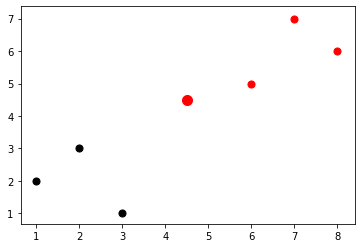

In [9]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color=result)

# Aplicando nuestro KNN al Dataset del Cancer

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt")

In [12]:
df.replace("?", -99999, inplace=True)
# inplace=True >> es para que lo asigne al objeto que estoy tratando

In [13]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [14]:
df.drop(["name"], 1, inplace=True) # 1 >> es para que borre columna, 
# inplace=True >> es para que lo asigne al objeto que estoy tratando

In [26]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [15]:
#convierto a numero float el dataset y lo hago una lista
full_data = df.astype(float).values.tolist()
print(type(full_data))
full_data

<class 'list'>


[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [20]:
import random

In [21]:
random.shuffle(full_data) # barajo o revolver el dataset

In [22]:
full_data

[[3.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0, 2.0],
 [10.0, 8.0, 8.0, 2.0, 8.0, 10.0, 4.0, 8.0, 10.0, 4.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [8.0, 6.0, 5.0, 4.0, 3.0, 10.0, 6.0, 1.0, 1.0, 4.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0],
 [5.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 10.0, 10.0, 10.0, 6.0, 10.0, 6.0, 5.0, 2.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [7.0, 5.0, 6.0, 3.0, 3.0, 8.0, 7.0, 4.0, 1.0, 4.0],
 [5.0, 7.0, 10.0, 10.0, 5.0, 10.0, 10.0, 10.0, 1.0, 4.0],
 [2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1

In [23]:
test_size = 0.2 # 20% 

In [24]:
train_set = {2:[],4:[]}# dicionario
test_set = {2:[], 4:[]}

In [27]:
train_data= full_data[:-int(test_size*len(full_data))]#[:-int(test_size*len(full_data))] tomar todos MENOS el 20% para "train_data"
print(type(train_data))
test_data = full_data[-int(test_size*len(full_data)):]#[-int(test_size*len(full_data)):] tomar DESDE el 20%  EN ANDELANTE
print(type(test_data))
test_data

<class 'list'>
<class 'list'>


[[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 10.0, 10.0, 5.0, 4.0, 5.0, 4.0, 4.0, 1.0, 4.0],
 [6.0, 10.0, 10.0, 10.0, 8.0, 10.0, 7.0, 10.0, 7.0, 4.0],
 [9.0, 8.0, 8.0, 9.0, 6.0, 3.0, 4.0, 1.0, 1.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [6.0, 10.0, 10.0, 2.0, 8.0, 10.0, 7.0, 3.0, 3.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0],
 [10.0, 5.0, 7.0, 4.0, 4.0, 10.0, 8.0, 9.0, 1.0, 4.0],
 [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0],
 [5.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0],
 [10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 10.0, 10.0, 7.0, 4.0],
 [10.0, 9.0, 7.0, 3.0, 4.0, 2.0, 7.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 4.0, 4.0, 10.0, 2.0, 10.0, 5.0, 3.0, 3.0, 4.0],
 [1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 2.0, 1

In [30]:
for i in test_data:
    print((i[-1]))

2.0
2.0
4.0
4.0
4.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
4.0
4.0
2.0
4.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
4.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
4.0
2.0
2.0
4.0
4.0
4.0
2.0
4.0
4.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
4.0
4.0
2.0
2.0
4.0
2.0
2.0
4.0
4.0
4.0
2.0
4.0
2.0
4.0
4.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
4.0
4.0
4.0
4.0
2.0
2.0
4.0
4.0
2.0
2.0
4.0
2.0
2.0
4.0
2.0
4.0
4.0
4.0
2.0
2.0
2.0
4.0
4.0
2.0
4.0
2.0
4.0
4.0
4.0
2.0
2.0
4.0
2.0
2.0
4.0
4.0


In [31]:
# ASIGNAR LOS VALORES DE LA LISTA AL DICIONARIO
for i in train_data:
    train_set[i[-1]].append(i[:-1]) # [i[-1]] = EL ULTIMO ELEMENTO DE CADA UNO DE LA FILA
                                    # .append(i[:-1]) UNIR DESDE EL INICIO MENOS EL ULTIMO    
for i in test_data:
    test_set[i[-1]].append(i[:-1]) # .append(i[:-1]) UNIR TODOS  MENOS EL ULTIMO 

In [32]:
test_set

{2: [[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0],
  [5.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 7.0],
  [3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [6.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 3.0,

In [35]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9568345323741008
